# 10 armed bandits testbed


Given 10 levers, each when actionned give us a certain return, we would like to have an agent maximizing the total return over a finite amount of timestep, one timestep corresponding to actionning a level among the 10 available.

We try two approaches : 
- greedy : always select the lever giving the best return so far
- $\epsilon$-greedy : greedy but choose a random lever with probability $\epsilon$


In [7]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt

In [61]:
def simulate(epsilons, T: int, n: int = 10):
    """
        Simulate an armed bandits episode of T steps. 
        Epsilon indicates the probability of exploring at each timestep
        as opposed to exploiting. 
    """
    returns = {epsilon : [] for epsilon in epsilons}
    levers = np.random.normal(loc=0, scale=1, size=(n))
    Q_init = [0 for _ in range(n)]
    choices = [i for i in range(n)]
    Q_t = {epsilon : Q_init[:] for epsilon in epsilons}
    n_chosen_t = {epsilon : [0 for _ in range(n)] for epsilon in epsilons}
    
    for step in range(T):
        # select action
        for epsilon in epsilons:
            if random.random() <= epsilon:
                a = random.choice(choices)
            else:
                a = np.argmax(Q_t[epsilon])
            
            # calculate reward
            reward = levers[a] + np.random.normal(loc=0,scale=1)
            # update returns
            returns[epsilon].append(reward)
            # update Q_t
            Q_t[epsilon][a] = Q_t[epsilon][a] * n_chosen_t[epsilon][a] / (n_chosen_t[epsilon][a] + 1) + reward / (n_chosen_t[epsilon][a] + 1)
            n_chosen_t[epsilon][a] += 1

    return returns

In [69]:
def simulate_N_and_average(epsilons, N = 2000 , T = 1000, n = 10):
    def to_numpy_array(returns):
        return np.array(list(returns.values()))
    averages = np.zeros((len(epsilons), T))
    for step in range(N):
        averages = to_numpy_array(simulate(epsilons,T,n)) / (step + 1) + averages * step / (step + 1)
    return averages
        
    

In [71]:
epsilons = [0, 0.05, 0.1]
simulations = simulate_N_and_average(epsilons)

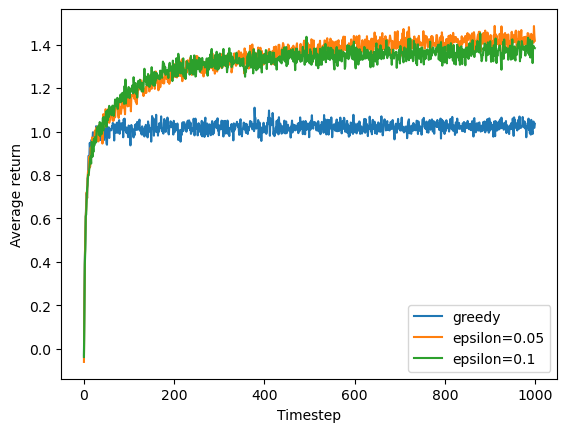

In [74]:
plt.figure()

plt.plot(range(T), simulations[0,:],label="greedy")
plt.plot(range(T), simulations[1,:],label="epsilon=0.05")
plt.plot(range(T), simulations[2,:],label="epsilon=0.1")

plt.xlabel("Timestep")
plt.ylabel("Average return")
plt.legend()
plt.show()



Exploring gives better returns in the long run on average. 
Think about it : if the policy is purely greedy, we do not have spend any time on exploring other possibilities and perhaps 